In [1]:
# Logistic Regression - Step 1: Import necessary libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

from sklearn.model_selection import train_test_split  # For splitting data into training/testing sets
from sklearn.linear_model import LogisticRegression  # For building the logistic regression model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # For model evaluation
from sklearn.preprocessing import StandardScaler  # For feature scaling (important for logistic regression)

# Placeholder: Load your dataset (Update the file path)
# df = pd.read_csv("path_to_your_dataset.csv")

# Display the first few rows to verify data structure (Uncomment after loading the dataset)
# print(df.head())

In [2]:
# Step 1: Load the dataset

df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/diabetes.csv')  # Load dataset

# Step 2: Display first few rows to verify data structure
print("Dataset preview:\n", df.head())

Dataset preview:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Step 3: Split the dataset into predictor variables (X) and target variable (y)

# Define predictor variables (features) by dropping the 'Outcome' column
X = df.drop("Outcome", axis=1)  

# Define target variable (label)
y = df['Outcome']  

# Print sample data for verification
print("Feature variables:\n", X.head())
print("\nTarget variable:\n", y.head())

Feature variables:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target variable:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [4]:
# Step 4: Standardize only the 'Insulin' column

from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the 'Insulin' column
X['Insulin'] = scaler.fit_transform(X[['Insulin']])

# Display first few scaled values for verification
print("Standard Scaled 'Insulin' values:\n", X[['Insulin']].head())

Standard Scaled 'Insulin' values:
     Insulin
0 -0.692891
1 -0.692891
2 -0.692891
3  0.123302
4  0.765836


In [5]:
# Step 5: Split data into training and testing sets

from sklearn.model_selection import train_test_split  # Import function for splitting data

# Divide the dataset: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Print dataset sizes for verification
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 537 samples
Testing set size: 231 samples


In [6]:
# Step 6: Create and Train a Logistic Regression Model

from sklearn.linear_model import LogisticRegression  # Import Logistic Regression

# Initialize classifier with solver based on dataset characteristics
classifier = LogisticRegression(solver='liblinear')  # Suitable for small datasets & binary classification

# Train (fit) the model using the training dataset
classifier.fit(X_train, y_train)

# Print model coefficients and intercept for interpretation
print("Model Coefficients:", classifier.coef_)  # Importance of each feature
print("Model Intercept:", classifier.intercept_)  # Baseline when all predictors are zero

Model Coefficients: [[ 0.09383824  0.02503341 -0.01981934 -0.00293599  0.04227076  0.0569127
   0.37167842  0.00932433]]
Model Intercept: [-5.00959381]


In [7]:
# Step 7: Make Predictions Using the Trained Logistic Regression Model

# Predict class labels for test and train datasets
y_test_prediction = classifier.predict(X_test)  # Predictions on test data
y_train_prediction = classifier.predict(X_train)  # Predictions on training data

# Display sample predictions for verification
print("Test Set Predictions:\n", y_test_prediction[:10])  # Showing first 10 test predictions
print("\nTrain Set Predictions:\n", y_train_prediction[:10])  # Showing first 10 train predictions

Test Set Predictions:
 [0 0 0 0 0 0 0 0 0 0]

Train Set Predictions:
 [1 0 0 0 0 1 1 0 0 0]


In [8]:
# Step 8: Compare Actual vs. Predicted Values

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction})

# Display first two rows to check accuracy
print("\nPredictions Comparison:\n", comparison.head(2))


Predictions Comparison:
      Actual  Predicted
285       0          0
101       0          0


In [9]:
# Step 9: Compute Model Accuracy

from sklearn.metrics import accuracy_score  # Import accuracy metric

# Calculate accuracy for training and test sets
test_accuracy = accuracy_score(y_test, y_test_prediction)
train_accuracy = accuracy_score(y_train, y_train_prediction)

# Print accuracy scores with four decimal precision
print(f"Test Accuracy: {test_accuracy:.4f}")   # Evaluates model performance on unseen data
print(f"Train Accuracy: {train_accuracy:.4f}") # Checks how well the model learned from training data

Test Accuracy: 0.7749
Train Accuracy: 0.7616


In [10]:
# H0: The patient does not have diabetes (Outcome = 0)
# H1: The patient has diabetes (Outcome = 1)
# FP (Type I Error): The model predicts the patient has diabetes, but in reality, they do not
# FN (Type II Error): The model predicts the patient does not have diabetes, but in reality, they have diabetes

In [11]:
# Step 10: Evaluate Model with Confusion Matrix

from sklearn.metrics import confusion_matrix  # Import confusion matrix function

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)

# Print confusion matrix with labels for interpretation
print("\nConfusion Matrix:")
print(conf_mat)

# Interpretation:
# - True Positives (TP): Correctly predicted as diabetic
# - True Negatives (TN): Correctly predicted as non-diabetic
# - False Positives (FP - Type I Error): Incorrectly predicted as diabetic
# - False Negatives (FN - Type II Error): Incorrectly predicted as non-diabetic


Confusion Matrix:
[[132  14]
 [ 38  47]]


In [12]:
# Sequence: R 1 C 1: TN, R 1 C 2: FP, R 2 C 1: FN, R 2 C 2: TP

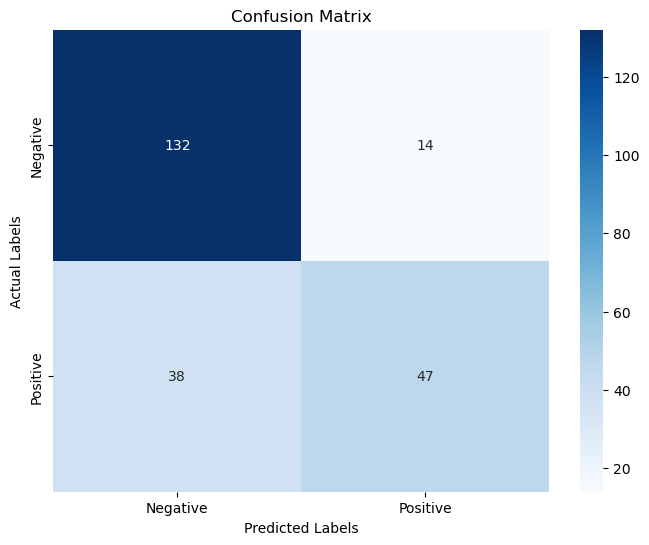

In [13]:
# Step 11: Visualize Confusion Matrix Using Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap with annotations
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add titles and labels for clarity
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

# Display the heatmap
plt.show()

In [14]:
# Step 12: Generate Classification Report for Model Evaluation

from sklearn.metrics import classification_report  # Import function for detailed classification metrics

# Compute and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))

# Interpretation:
# - **Precision**: Out of predicted positives, how many were truly positive?
# - **Recall (Sensitivity)**: Out of actual positives, how many did the model correctly identify?
# - **F1-score**: Harmonic mean of precision and recall, balancing both metrics.
# - **Support**: Number of actual occurrences for each class in the dataset.


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [15]:
# Step 13: Extract TP, TN, FP, FN from the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)

# Extract individual components
TN, FP, FN, TP = conf_mat.ravel()

# Print extracted values for interpretation
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP - Type I Error): {FP}")
print(f"False Negatives (FN - Type II Error): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 132
False Positives (FP - Type I Error): 14
False Negatives (FN - Type II Error): 38
True Positives (TP): 47


In [16]:
# Step 14: Extract Confusion Matrix Components Manually

# Extract values directly from the confusion matrix
TN = conf_mat[0, 0]  # True Negatives
FP = conf_mat[0, 1]  # False Positives (Type I Error)
FN = conf_mat[1, 0]  # False Negatives (Type II Error)
TP = conf_mat[1, 1]  # True Positives

# Print extracted values for interpretation
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP - Type I Error): {FP}")
print(f"False Negatives (FN - Type II Error): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 132
False Positives (FP - Type I Error): 14
False Negatives (FN - Type II Error): 38
True Positives (TP): 47


In [17]:
# Step 15: Compute Model Evaluation Metrics

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_test_prediction)
precision = precision_score(y_test, y_test_prediction)
recall = recall_score(y_test, y_test_prediction)
f1 = f1_score(y_test, y_test_prediction)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")      # Overall correctness of the model
print(f"Precision: {precision:.4f}")    # TP / (TP + FP) - How precise are the positive predictions?
print(f"Recall: {recall:.4f}")          # TP / (TP + FN) - How well does the model detect actual positives?
print(f"F1 Score: {f1:.4f}")            # Balances precision and recall

Accuracy: 0.7749
Precision: 0.7705
Recall: 0.5529
F1 Score: 0.6438
